# Hyper-parameters in Action!

## Moons Dataset

In [ ]:
# To run this notebook on Google Colab, you need to run these two commands first
# to install FFMPEG (to generate animations - it may take a while to install!)
# and the actual DeepReplay package

#!sudo apt-get install ffmpeg
#!pip install deepreplay

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import glorot_normal, normal

from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_animations, compose_plots

import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.datasets import make_moons

%matplotlib inline

/home/dvgodoy/Programs/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loads data and creates ReplayData callback

In [2]:
group_name = 'moons'

X, y = make_moons(n_samples=2000, random_state=27, noise=0.03)

replaydata = ReplayData(X, y, filename='moons_dataset.h5', group_name=group_name)

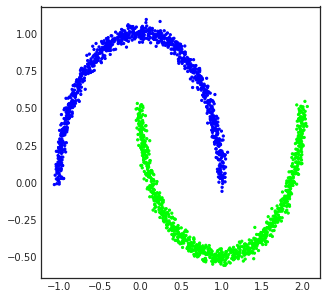

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(*X.transpose(), c=y, cmap=plt.cm.brg, s=5)

### Builds Keras model

In [4]:
sgd = SGD(lr=0.01)

glorot_initializer = glorot_normal(seed=42)
normal_initializer = normal(seed=42)

model = Sequential()
# Hidden layer with 4 units, taking the 2 features as inputs
model.add(Dense(input_dim=2,
                units=4,
                kernel_initializer=glorot_initializer,
                activation='tanh'))

# Added layer to allow plotting the feature space
# It has 2 units and uses a LINEAR activation, so the network will also learn the
# mapping from 4-dimensions to 2-dimensions
model.add(Dense(units=2,
                kernel_initializer=glorot_initializer,
                activation='tanh',
                name='hidden'))

# Typical output layer for binary classification
model.add(Dense(units=1,
                kernel_initializer=normal_initializer,
                activation='sigmoid',
                name='output'))

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
hidden (Dense)               (None, 2)                 10        
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


### Trains the model using ReplayData as a callback to store the information

In [5]:
model.fit(X, y, epochs=200, batch_size=16, callbacks=[replaydata])

Epoch 1/200
2000/2000 [==============================] - 0s 43us/step - loss: 0.6921 - acc: 0.5390
Epoch 2/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.6886 - acc: 0.8320
Epoch 3/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.6836 - acc: 0.8235
Epoch 4/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.6750 - acc: 0.8255
Epoch 5/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.6601 - acc: 0.8180
Epoch 6/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.6352 - acc: 0.8170
Epoch 7/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.5973 - acc: 0.8205
Epoch 8/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.5480 - acc: 0.8260
Epoch 9/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.4944 - acc: 0.8340
Epoch 10/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.4451 - acc: 0.8400
Epoch 11/

2000/2000 [==============================] - 0s 39us/step - loss: 0.1884 - acc: 0.9225
Epoch 84/200
2000/2000 [==============================] - 0s 39us/step - loss: 0.1819 - acc: 0.9285
Epoch 85/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.1743 - acc: 0.9315
Epoch 86/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.1664 - acc: 0.9345
Epoch 87/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.1583 - acc: 0.9400
Epoch 88/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.1514 - acc: 0.9410
Epoch 89/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.1433 - acc: 0.9475
Epoch 90/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.1364 - acc: 0.9510
Epoch 91/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.1295 - acc: 0.9575
Epoch 92/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.1223 - acc: 0.9560
Epoch 93/200


### Builds figure to attach the plots to

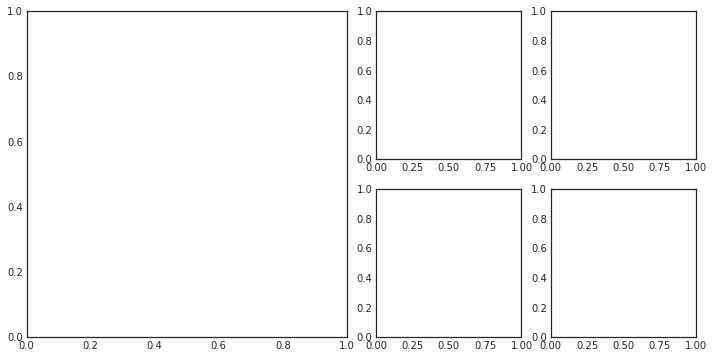

In [6]:
fig = plt.figure(figsize=(12, 6))
ax_fs = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax_ph_neg = plt.subplot2grid((2, 4), (0, 2))
ax_ph_pos = plt.subplot2grid((2, 4), (1, 2))
ax_lm = plt.subplot2grid((2, 4), (0, 3))
ax_lh = plt.subplot2grid((2, 4), (1, 3))

### Loads data into Replay and builds the plots

In [7]:
replay = Replay(replay_filename='moons_dataset.h5', group_name=group_name)

fs = replay.build_feature_space(ax_fs, layer_name='hidden',
                                xlim=(-1, 2), ylim=(-.5, 1),
                                display_grid=False)
ph = replay.build_probability_histogram(ax_ph_neg, ax_ph_pos)
lh = replay.build_loss_histogram(ax_lh)
lm = replay.build_loss_and_metric(ax_lm, 'acc')

### Plotting the figure for 160th epoch

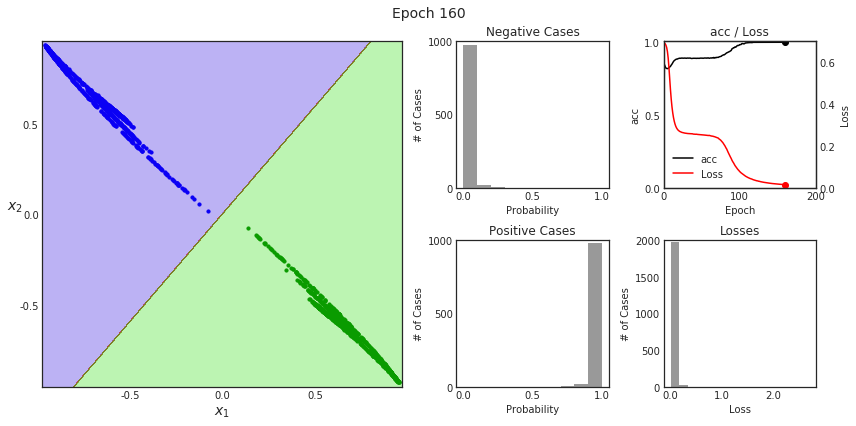

In [9]:
sample_figure = compose_plots([fs, ph, lm, lh], 160)
sample_figure

### Animating the plot

In [10]:
sample_anim = compose_animations([fs, ph, lm, lh])
HTML(sample_anim.to_html5_video())